Implementing the Klausmeier ODE System, doing some simulations.

###### [1] Klausmeier, C. A. (1999). Regular and irregular patterns in semiarid vegetation. *Science, 284*(5421), 1826-1828. https://doi.org/10.1126/science.284.5421.1826


In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [2]:
using DifferentialEquations, CSV, DataFrames, Plots

In [3]:
# define spatially homogeneous version of Klausmeier model
function klausmeier!(du,u,p,t)
 du[1] = -u[1] - u[1] * u[2]^2 + p[1] # water compartment
 du[2] = u[1] * u[2]^2 - p[2] * u[2] # biomass compartment
end

klausmeier! (generic function with 1 method)

##### try to solve for some prms
goal is to examine which influence choice of w0 has for fixed (a,n0) combination.

In [118]:
u0 = [0.9;1.3]          # initial conditions
tspan = (0.0,29.0)      # start and end point of the time period to be considered
a = 0.9
m = 0.45                # value as in [1]
p = [a;m]

prob = ODEProblem(klausmeier!, u0, tspan, p)
sol = solve(prob,
    saveat=0.1  # consider specific time points
    )

df_sol = DataFrame(time=sol.t, w=sol[1, :], n=sol[2, :]);


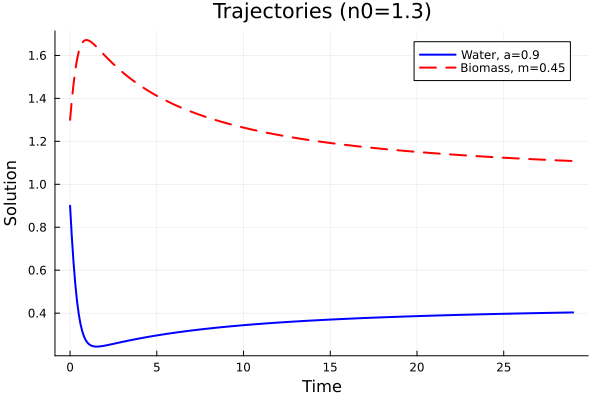

In [117]:
# plot for better visualization
plot(df_sol.time, df_sol.w, label="Water, a=$a", lw=2, color=:blue)
plot!(df_sol.time, df_sol.n, label="Biomass, m=$m", lw=2, linestyle=:dash, color=:red)

xlabel!("Time")
ylabel!("Solution")
title!("Trajectories (n0=$(u0[2]))")

Results:
- as we use only n-trajectory in the computation of the likelihood, we are only interested in how the red curve changes for initial w0 values
- "converges" after few time steps
- differences are not big (visually) for different values of w0

-> for now I use w0=0.9 (i.e. mean across all a values considered)